- Author: Maximiliano Lopez Salgado
- First Commit: 2023-07-04                      (folowing ISO  8601 Format)
- Last Commit: 2023-07-04                       (folowing ISO  8601 Format)
- Description: This notebook is used to perform EDA on the Superstore dataset

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
from folium import plugins
import sqlite3

# Exploratory Data Analysis (EDA)

## 1. Understanding the data

### 1.1 Gathering data

In [3]:
# Import csv cleaned files 
superstore_df = pd.read_csv('../datasets/Sample-Superstore.csv', encoding='latin1')


### 1.2 Assesing data

In [4]:
# Take a look of the data´s shape
display(superstore_df.info)

<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520      

In [5]:
# Take a look of the data´s info
display(superstore_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

None

In [6]:
# Use describe method to get descriptive statistics
display(superstore_df.describe())

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## 2. Extracting and Plotting the data

From the dataframes we have, here are some potential information we can extract:

**DataFrame: Superstore_df**
- What customer purchasing patterns can you deduce? Such as during the days of the week, weekly, monthly, quarterly, yearly, etc.

- Are there specific days/months/quarters when the sales have been unusually high/low, and what could be the possible reasons? How about the profit and loss margin?

- Which states and which customers made the highest number of orders? Are they the same as the highest spending states and customers?

- Can you make a map showing the 5 states generating the most and least sales revenue?

- Can we see the quarterly revenue behavior?

- Can you create a plot showing the growth rate of new customers over the months?

- What do you think about the customers? Are they individuals or wholesalers? Why would you say so?

- Are there any issues with the dataset?

## DataFrame: Superstore_df

In [263]:
# Check the distribution of customers across different segments.
customer['segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: segment, dtype: int64

In [264]:
# Explore the unique values and their frequencies in the 'customer_name' column.
customer['customer_name'].value_counts().head(10)

William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
Seth Vernon            32
Jonathan Doherty       32
Edward Hooks           32
Zuschuss Carroll       31
Emily Phan             31
Name: customer_name, dtype: int64

In [265]:
# Analyze the customer_id distribution and check for any inconsistencies.
customer['customer_id'].value_counts().head(10)


WB-21850    37
JL-15835    34
MA-17560    34
PP-18955    34
CK-12205    32
SV-20365    32
JD-15895    32
EH-13765    32
ZC-21910    31
EP-13915    31
Name: customer_id, dtype: int64

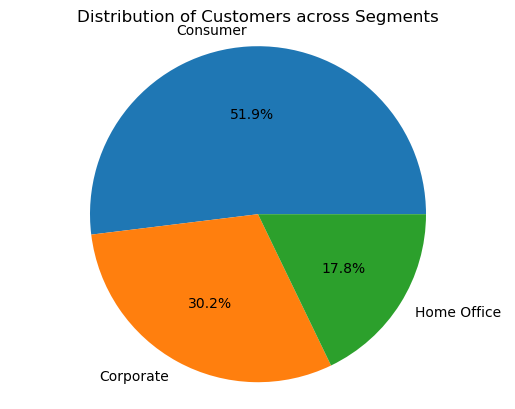

In [266]:
# Pie plot: Plot the count of customers in each segment to visualize the distribution of customer segments.
segment_counts = customer['segment'].value_counts()
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Customers across Segments')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()

In [267]:
# Descriptive statistics about "customer_id" column
customer['customer_id'].describe()


count         9994
unique         793
top       WB-21850
freq            37
Name: customer_id, dtype: object

## DataFrame 2: Product

In [268]:
# Analyze the product categories and sub categories present in the dataset.
categories = product['category'].nunique()
sub_categories = product['sub-category'].nunique()

print('Categories:', categories)
print('Sub-Categories:', sub_categories)

Categories: 3
Sub-Categories: 17


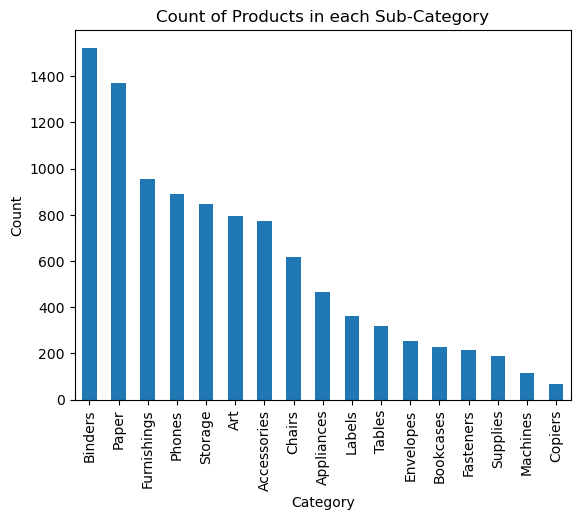

In [269]:
# Bar plot: Plot the count of products in each category or sub category to understand the product distribution.
category_counts = product['sub-category'].value_counts()

category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Products in each Sub-Category')
plt.show()

In [270]:
# Count the top 10 most selled products
product_name_count = product['product_name'].str.lstrip().value_counts()
print('Product:\n', product_name_count.head(10))

Product:
 Staple envelope                                              48
Staples                                                      46
Easy-staple paper                                            46
Avery Non-Stick Binders                                      20
Staples in misc. colors                                      19
Staple remover                                               18
KI Adjustable-Height Table                                   18
Storex Dura Pro Binders                                      17
Staple-based wall hangings                                   16
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling    15
Name: product_name, dtype: int64


## DataFrame 3: Sale

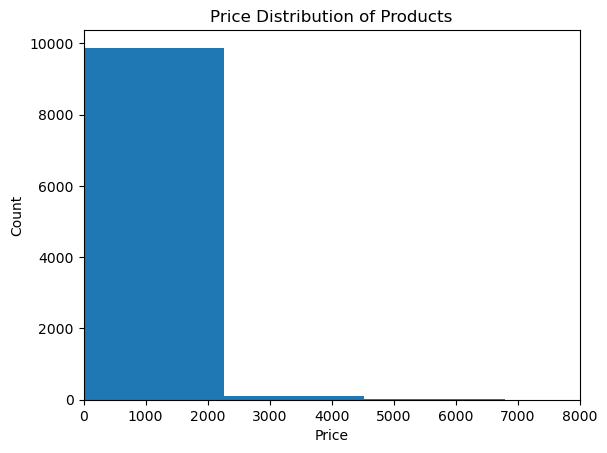

In [271]:
# Explore the price distribution and identify any outliers or unusual patterns.
sale['price'].plot(kind='hist', bins=10)
plt.xlim(0, 8000)  # Set the x-axis limits
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution of Products')
plt.show()

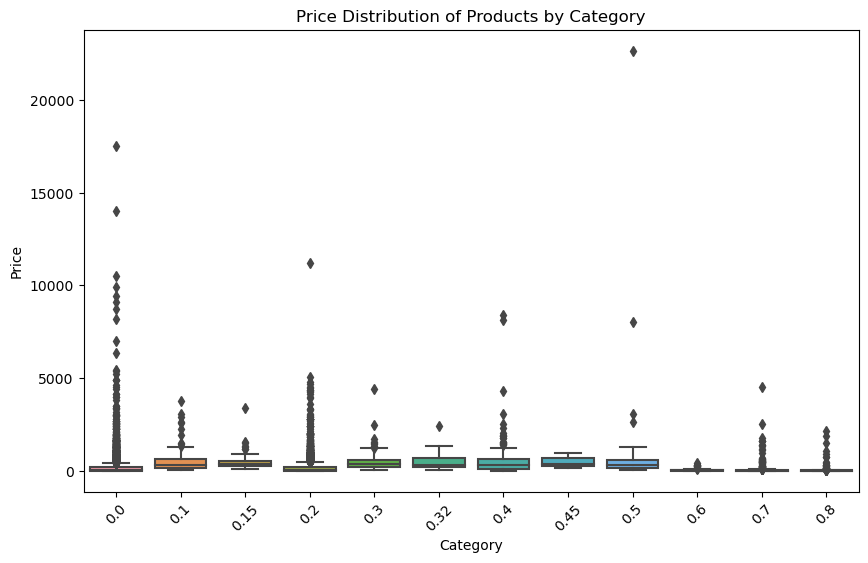

In [272]:
# Box plot: Analyze the price/discount distribution of products and identify any outliers or variations.
plt.figure(figsize=(10, 6))  # Set the figure size

sns.boxplot(x='discount', y='price', data=sale)
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Price Distribution of Products by Category')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

In [273]:
# Check the distribution of quantities and discounts.
sale[['quantity', 'discount']].describe()

,quantity,discount
count,9994.000000,9994.000000
mean,3.789574,0.156203
std,2.225110,0.206452
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.200000
75%,5.000000,0.200000
max,14.000000,0.800000


## DataFrame 4: Geolocation

In [274]:
# Explore the countries, cities, and regions represented in the dataset.
countries = geolocation['country'].nunique()
cities = geolocation['city'].nunique()
regions = geolocation['region'].nunique()

print('Countries:', countries)
print('Cities:', cities)
print('Regions:', regions)

Countries: 1
Cities: 531
Regions: 4


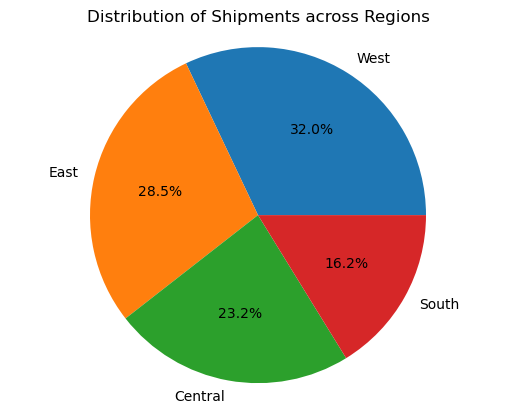

In [275]:
# Pie chart: Visualize the distribution of shipments across different regions using a pie chart.
region_counts = geolocation['region'].value_counts()

plt.pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Shipments across Regions')
plt.axis('equal')
plt.show()

## DataFrame 5: Shipment

In [276]:
# Examine the distribution of shipments across different shipping modes.
shipping_mode_counts = shipment['ship_mode'].value_counts()

print(shipping_mode_counts)

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: ship_mode, dtype: int64


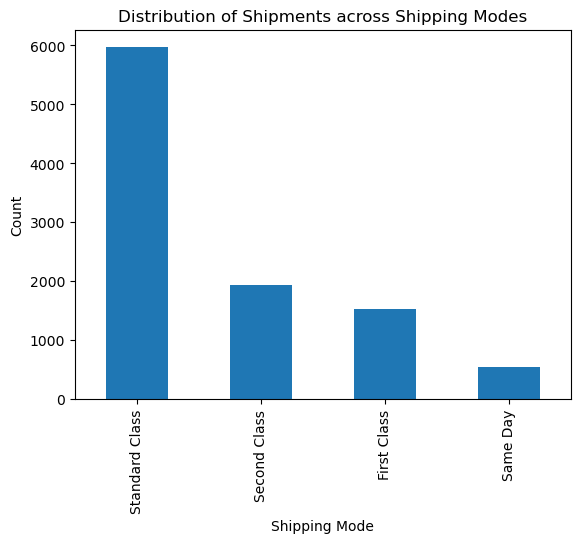

In [277]:
# Bar plot: Plot the count of shipments for each shipping mode
shipping_mode_counts.plot(kind='bar')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')
plt.title('Distribution of Shipments across Shipping Modes')
plt.show()


In [278]:
# Analyze the distribution of shipments over time using the 'ship_date' column.
shipment['ship_date'] = pd.to_datetime(shipment['ship_date'])
shipment['year'] = shipment['ship_date'].dt.year

shipments_over_time = shipment['year'].value_counts().sort_index()
print(shipments_over_time)

2014    1940
2015    2131
2016    2578
2017    3303
2018      42
Name: year, dtype: int64


In [279]:
# Analyze the relationship between shipment_code and the corresponding shipments.
shipment_by_code = shipment.groupby('ship_id').size()
print(shipment_by_code)

ship_id
ship-00001    1
ship-00002    1
ship-00003    1
ship-00004    1
ship-00005    1
             ..
ship-09990    1
ship-09991    1
ship-09992    1
ship-09993    1
ship-09994    1
Length: 9994, dtype: int64


## DataFrame 6: Order

In [280]:
# Examine the distribution of orders by order_date.
order['order_date'] = pd.to_datetime(order['order_date']) # convert order_date to datetime format
order_by_date = order.groupby('order_date').size()

print(order_by_date)

order_date
2014-01-03     1
2014-01-04     3
2014-01-05     1
2014-01-06     9
2014-01-07     2
              ..
2017-12-26     4
2017-12-27     2
2017-12-28    19
2017-12-29    12
2017-12-30     7
Length: 1237, dtype: int64


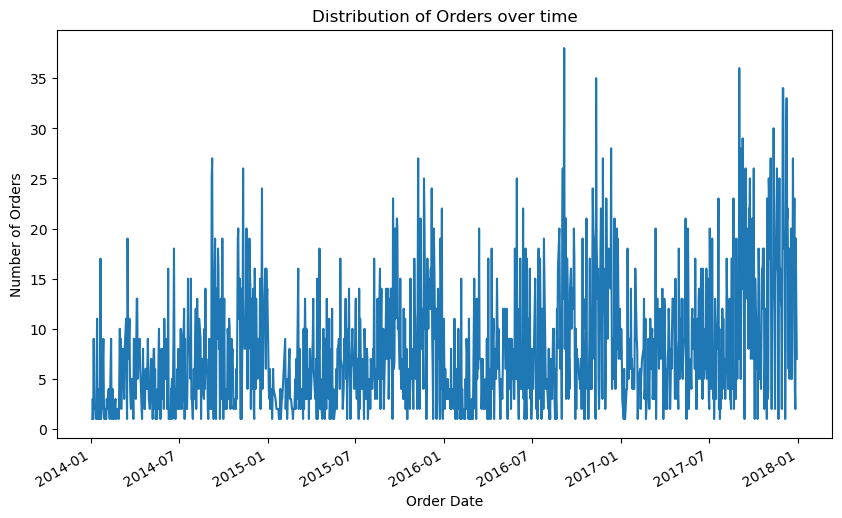

In [281]:
# Line plot: Plot the count of orders over time using the order_date column to observe any trends or seasonality.
plt.figure(figsize=(10,6))
order_by_date.plot()
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders over time')
plt.show()

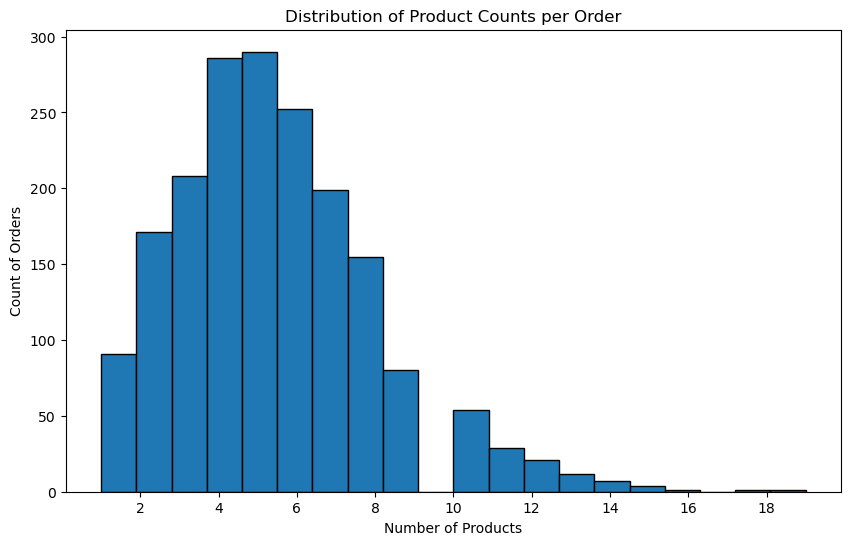

In [282]:
# Bar plot: Visualize the count of products in each order to understand the order composition.
# Count the number of products in each order
order_product_count = order['product_number'].value_counts()

# Plot the histogram of product counts per order
plt.figure(figsize=(10, 6))
plt.hist(order_product_count, bins=20, edgecolor='black')

# Set the x-axis tick locator to display only integers
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.xlabel('Number of Products')
plt.ylabel('Count of Orders')
plt.title('Distribution of Product Counts per Order')
plt.show()

# Analyses specific to geolocation data

In [283]:
# import the superstore_df df
# import csv files 
superstore_df = pd.read_csv('../datasets/Sample-Superstore.csv', encoding='latin1')

## Geographic distribution of values (i.e. customers, start/end points) on a map

## Geographic distribution of Customers on a map

We will be using a random sample of the data in case due to the size of the df in order to avoid running errors.

In [284]:
# Create a map object centered at a specific latitude and longitude you want in the USA, for example:
map = folium.Map(location=[39.18786550380514,-98.93578850412071], zoom_start=5)

# Create a geolocator object
geolocator = Nominatim(user_agent="superstore")  # Create a geolocator object

# Sample a subset of the DataFrame
sample_size = 300  # Adjust the sample size as desired
sample_df = superstore_df.sample(n=sample_size)

# Iterate over the sample DataFrame and add markers for each location
for index, row in sample_df.iterrows():
    city = row['City']
    address = f"{city}, {row['State']}, {row['Country']}"
    location = geolocator.geocode(address)
    if location:
        lat = location.latitude
        lon = location.longitude
        marker = folium.Marker(location=[lat, lon], popup=city)
        marker.add_to(map)

# Save the map
map.save('heatmap.html')

# Display the map
map

## Heatmap - Regions with the highest concentration of values.


In [285]:


# Create a map object centered at a specific latitude and longitude you want in the USA, for example:
map = folium.Map(location=[39.18786550380514,-98.93578850412071], zoom_start=5)

# Create a HeatMap layer using the latitude, longitude, and sales sum
heat_data = superstore_df.groupby(['City', 'Latitude', 'Longitude'])['Sales'].sum().reset_index().values.tolist()
HeatMap(heat_data).add_to(map)

# Save the map as an HTML file
map.save('heatmap.html')

KeyError: 'Latitude'